In [1]:
from sklearn import linear_model, tree, ensemble, svm, neighbors
from sklearn import metrics
from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

import pickle
import os

In [2]:
seed = 223

# Load Data

In [3]:
train = pd.read_csv('../data/train(regression).csv')

# Preprocessing 

In [4]:
X = train.drop(['id','y'],axis=1)
y = train['y']

## Split data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print('x_train.shape: ',x_train.shape)
print('x_test.shape: ',x_test.shape)

x_train.shape:  (4900, 10)
x_test.shape:  (2100, 10)


# Building Models

In [6]:
ols = linear_model.LinearRegression()
ridge = linear_model.Ridge(random_state=seed)
lasso = linear_model.Lasso(random_state=seed)
elastic = linear_model.ElasticNet(random_state=seed)

dt = tree.DecisionTreeRegressor(random_state=seed)
rf = ensemble.RandomForestRegressor(random_state=seed)
ada = ensemble.AdaBoostRegressor(random_state=seed)
gt = ensemble.GradientBoostingRegressor(random_state=seed)

svr = svm.SVR()
knn = neighbors.KNeighborsRegressor()

# Training

In [7]:
ols.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
elastic.fit(x_train,y_train)

dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
ada.fit(x_train,y_train)
gt.fit(x_train,y_train)

svr.fit(x_train,y_train)
knn.fit(x_train,y_train)

/home/jaehyuk/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Evaluation

In [8]:
ols_pred = ols.predict(x_test)
ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)
elastic_pred = elastic.predict(x_test)

dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
ada_pred = ada.predict(x_test)
gt_pred = gt.predict(x_test)

svr_pred = svr.predict(x_test)
knn_pred = knn.predict(x_test) 

In [9]:
model_name = ['ols','ridge','lasso','elastic','dt','rf','ada','gt','svr','knn']
model = [ols, ridge, lasso , elastic, dt, rf, ada, gt, svr, knn]
pred_lst = [ols_pred, ridge_pred, lasso_pred, elastic_pred, dt_pred, rf_pred, ada_pred, gt_pred, svr_pred, knn_pred]

In [26]:
x_test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
364,0.540595,0.639197,-1.163050,0.446342,0.114174,0.396957,0.716914,-1.149090,1.850070,0.753956
2046,0.541608,-0.308974,0.315775,0.302836,-0.196372,-1.237122,-0.591386,0.558533,0.893032,-1.017113
3698,1.590032,0.248114,-0.345884,0.053209,0.690322,0.964791,0.040908,0.782212,-0.251750,0.189400
6551,-1.905108,-0.203161,0.531597,-1.166125,-0.028782,-0.561947,0.098695,0.494795,0.547220,0.508896
3164,0.934084,0.389502,-0.002566,0.510027,0.371135,0.749591,1.810294,-0.335305,-0.053539,0.100665


## Visualization

In [10]:
pred_df = pd.DataFrame(dict([model_name[i],pred_lst[i]] for i in range(len(model_name))))

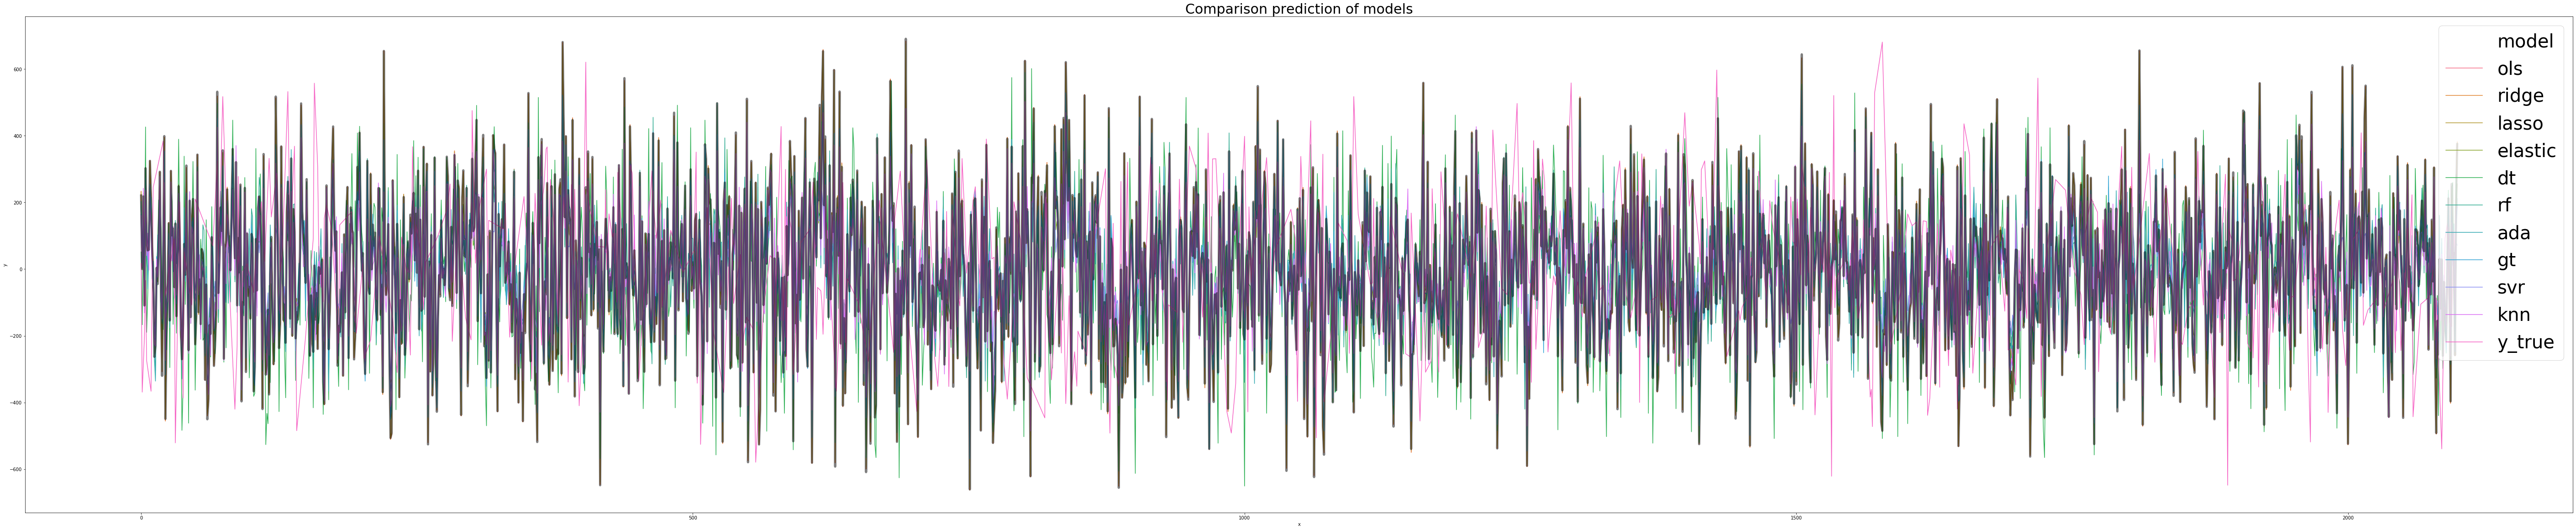

In [23]:
unstack_pred_df = pred_df.unstack().reset_index()
unstack_pred_df.columns = ['model','x','value']

plt.figure(figsize=(100,20))
sns.lineplot(x='x', y='value', hue='model', data=unstack_pred_df)
sns.lineplot(x=range(x_test.shape[0]), y=y_test, linewidth=5, color='black', alpha=0.5, linestyle='--')
plt.legend(fontsize=40)
plt.title('Comparison prediction of models', size=30)
plt.show()

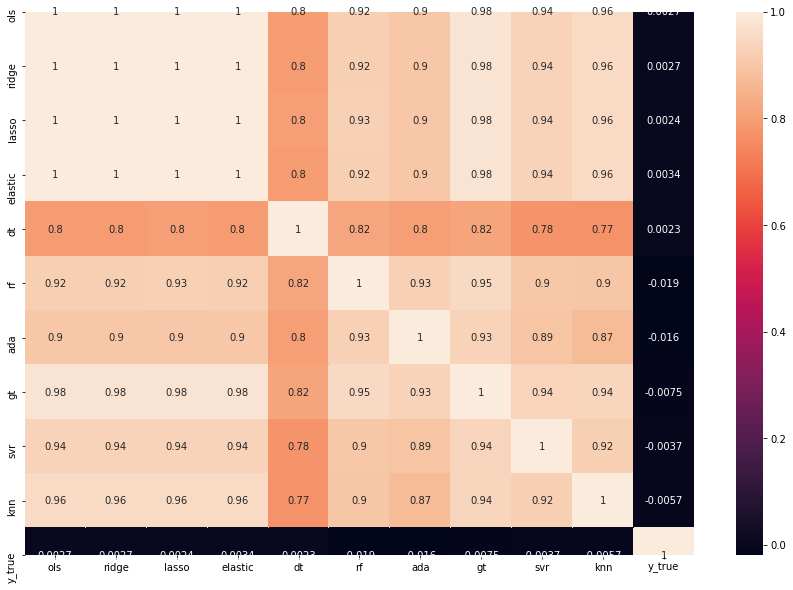

In [12]:
plt.figure(figsize=(15,10))
pred_df['y_true'] = y_test
sns.heatmap(pred_df.corr(), annot=True)
plt.show()

In [13]:
def model_eval(y_true, y_pred):
    mse = round(metrics.mean_squared_error(y_true, y_pred), 3)
    mae = round(metrics.mean_absolute_error(y_true, y_pred), 3)
    
    return mse, mae

In [14]:
eval_df = pd.DataFrame(dict([model_name[i],model_eval(y_test, pred_lst[i])] for i in range(len(model_name))),
                       index=['MSE','MAE'])

In [15]:
eval_df.T.sort_values(by='MSE')

,MSE,MAE
ols,26.083,4.102
ridge,26.096,4.102
lasso,37.068,4.871
gt,3532.584,45.246
elastic,5661.742,59.878
knn,6357.253,61.616
rf,8265.237,70.332
ada,11305.418,82.177
svr,14885.521,83.946
dt,19384.561,109.482


# Save & Load

## Save

In [16]:
for i in range(len(model_name)):
    with open(f'../save/notebook_regression/{model_name[i]}_nb_reg.pkl', 'wb') as file:
        pickle.dump(model[i], file)

In [17]:
eval_df.T.sort_values(by='MSE').to_csv('../save/notebook_regression/metrics.csv')

## Load

In [18]:
load_model = []
for i in range(len(model_name)):
    with open(f'../save/notebook_regression/{model_name[i]}_nb_reg.pkl', 'rb') as file:
        load_model.append(pickle.load(file))

In [19]:
load_eval_df = pd.DataFrame(dict([model_name[i],model_eval(y_test, load_model[i].predict(x_test))] for i in range(len(model_name))),
                            index=['MSE','MAE'])
load_eval_df.T.sort_values(by='MSE')

,MSE,MAE
ols,26.083,4.102
ridge,26.096,4.102
lasso,37.068,4.871
gt,3532.584,45.246
elastic,5661.742,59.878
knn,6357.253,61.616
rf,8265.237,70.332
ada,11305.418,82.177
svr,14885.521,83.946
dt,19384.561,109.482


In [20]:
load_eval_df.T.sort_values(by='MSE') == eval_df.T.sort_values(by='MSE')

,MSE,MAE
ols,True,True
ridge,True,True
lasso,True,True
gt,True,True
elastic,True,True
knn,True,True
rf,True,True
ada,True,True
svr,True,True
dt,True,True
